In [1]:
'''  we need to import the library of python like numpy ,pandas, warnings
'''

'  we need to import the library of python like numpy ,pandas, warnings\n'

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('transfusion.data')
df

# we can read the dataframe.
''' there are 748 rows and 5 columns present in the dataset.'''

' there are 748 rows and 5 columns present in the dataset.'

In [4]:
''' 
to see more information about the table we are using info inbuilt function to check the more information about the data  like the datatype
and not null values columns and rows the total number of entries
'''

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
''' to decribe the dataset  we use the inbuilt function  as decribe and get information like count,mean std min,median and mode 
'''

df.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [6]:
''' 
to check the value count of the columns we use the inbuilt function value_count 
'''

df['whether he/she donated blood in March 2007'].value_counts

<bound method IndexOpsMixin.value_counts of 0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: whether he/she donated blood in March 2007, Length: 748, dtype: int64>

In [7]:
'''
 for data visualisation we need to use python library like seaborn and matplotlib

 first we need to import the libraries.
'''

import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Histogram of Recency (months)')

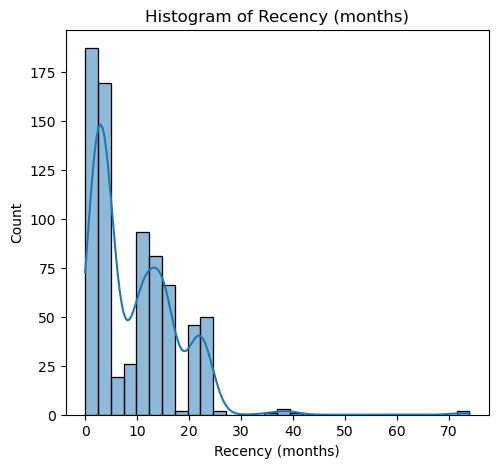

In [8]:
# Histogram of receny coolumn
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Recency (months)'], kde=True)
plt.title('Histogram of Recency (months)')



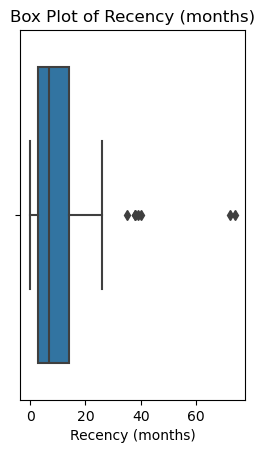

In [9]:

# Box Plot of recency
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Recency (months)'])
plt.title('Box Plot of Recency (months)')

plt.show()

Text(0.5, 1.0, 'Histogram of Frequency (times)')

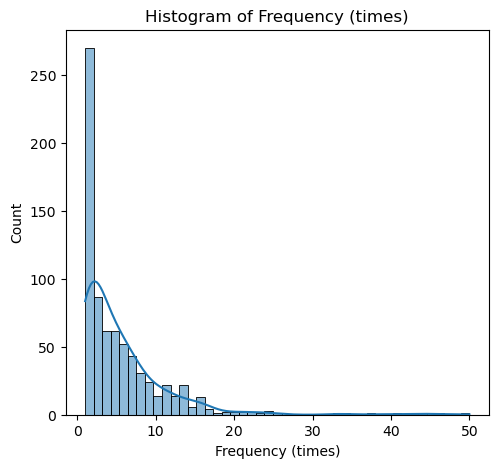

In [10]:
# Histogram of frequency
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Frequency (times)'], kde=True)
plt.title('Histogram of Frequency (times)')


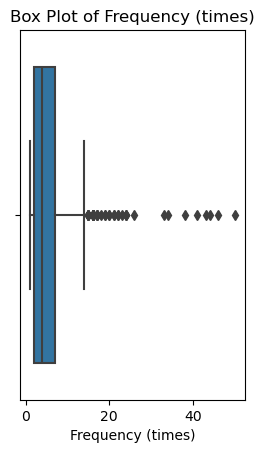

In [11]:
# Box Plot  of frequency
plt.subplot(1, 2, 2)
sns.boxplot(x=df['Frequency (times)'])
plt.title('Box Plot of Frequency (times)')

plt.show()

Text(0.5, 1.0, 'Histogram of Monetary (c.c. blood)')

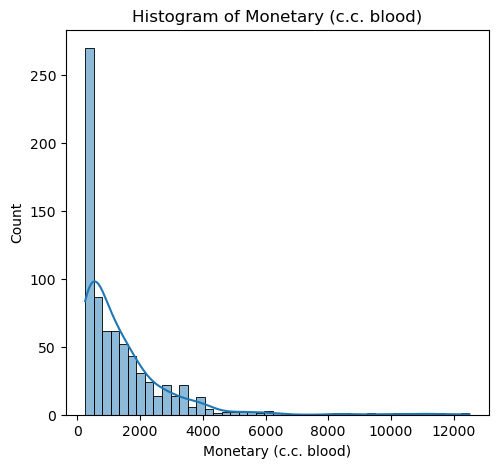

In [12]:
# Histogram of frequency
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Monetary (c.c. blood)'], kde=True)
plt.title('Histogram of Monetary (c.c. blood)')


In [13]:
'''
before using the machine learning algorithm we need to  set the target and features point 
as shown below 
'''

features=df
target=df.iloc[:,-1]

In [14]:
'''
firstly we need to import the train test split from sklearn which is the famous python library used for machine algorithm 
'''
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features, target,test_size=0.3,random_state=1)

In [15]:
'''
 since our target column is a classification model so we are using  logistic regression model to check the accuracy.

'''
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Accuracy : {ac}\n{cm}\n{cr}")

'''
after applying logistic regression we got an accuracy of of 100% 
'''

Accuracy : 1.0
[[165   0]
 [  0  60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00        60

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225



'\nafter applying logistic regression we got an accuracy of of 100% \n'

In [17]:
'''
after applying logistic regression we have applied support vector  classifier to check the accuracy.
so we need to import svc from sklern 
'''

from sklearn.svm import SVC
svm=SVC()
svm.fit(xtrain,ytrain)
ypred=svm.predict(xtest)


In [18]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Accuracy : {ac}\n{cm}\n{cr}")
'''
we got an accuracy of 74% which is less as comapared to logistic regression
'''

Accuracy : 0.7422222222222222
[[165   0]
 [ 58   2]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       165
           1       1.00      0.03      0.06        60

    accuracy                           0.74       225
   macro avg       0.87      0.52      0.46       225
weighted avg       0.81      0.74      0.64       225



'\nwe got an accuracy of 74% which is less as comapared to logistic regression\n'

In [19]:
'''
to increase the accuracy we are preprocessing the data using standard scaler
'''

from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
xtrain_s =ss.fit_transform(xtrain)
xtest_s=ss.transform(xtest)
 

In [20]:

svm=SVC()
svm.fit(xtrain_s,ytrain)
ypred=svm.predict(xtest_s)


In [21]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Accuracy : {ac}\n{cm}\n{cr}")
'''
after processing the data and then checking the accuracy we got an accuracy of 100%
'''

Accuracy : 1.0
[[165   0]
 [  0  60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00        60

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225



'\nafter processing the data and then checking the accuracy we got an accuracy of 100%\n'

In [22]:
'''
we are using decision tree classifier to check the accuracy.
'''
from sklearn.tree import DecisionTreeClassifier

In [23]:
model=DecisionTreeClassifier(criterion="entropy")
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [24]:

ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Accuracy : {ac}\n{cm}\n{cr}")
'''
we got an accuracy of 100%
'''

Accuracy : 1.0
[[165   0]
 [  0  60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00        60

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225



'\nwe got an accuracy of 100%\n'

In [25]:
'''we are using random forest classifier to check the accuracy
'''
from sklearn.ensemble import RandomForestClassifier

In [26]:
model=RandomForestClassifier(criterion="entropy")
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)

In [27]:

ac=accuracy_score(ytest,ypred)
cm=confusion_matrix(ytest,ypred)
cr=classification_report(ytest,ypred)

print(f"Accuracy : {ac}\n{cm}\n{cr}")
'''
after applying random forest we got an accuracy of 100%
'''

Accuracy : 1.0
[[165   0]
 [  0  60]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       165
           1       1.00      1.00      1.00        60

    accuracy                           1.00       225
   macro avg       1.00      1.00      1.00       225
weighted avg       1.00      1.00      1.00       225



'\nafter applying random forest we got an accuracy of 100%\n'

<Axes: xlabel='whether he/she donated blood in March 2007', ylabel='count'>

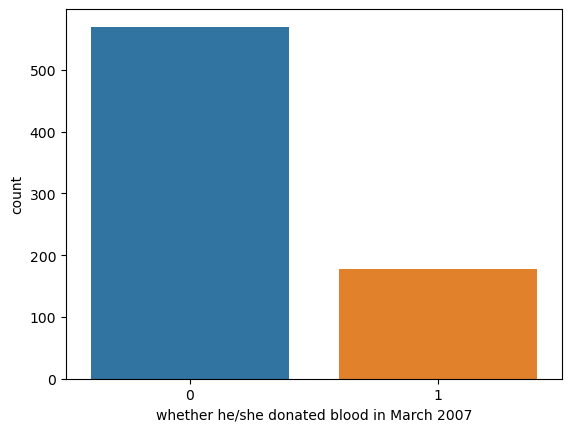

In [28]:
'''
we are plotting an countplot to check whether the person has donated blood or not
'''
sns.countplot(data=df, x="whether he/she donated blood in March 2007")

<Axes: xlabel='Recency (months)', ylabel='Count'>

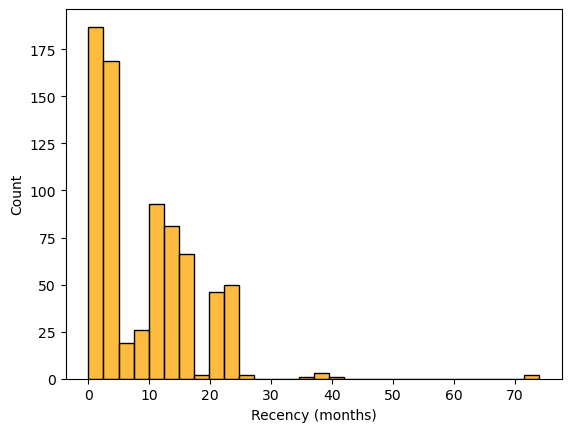

In [29]:
sns.histplot(data=df["Recency (months)"],color="orange")